Data Cleaning

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Titanic-Dataset.csv')

missing_values = data.isnull().sum()

data['Age'].fillna(data['Age'].median(), inplace=True)

data.drop(columns=['Cabin'], inplace=True)

<ipython-input-3-fdaa32147ee9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Data Analysis

In [5]:
survival_rate_by_gender = data.groupby('Sex')['Survived'].mean()

average_age_survivors = data[data['Survived'] == 1]['Age'].mean()
average_age_non_survivors = data[data['Survived'] == 0]['Age'].mean()

pclass_survival = pd.crosstab(data['Pclass'], data['Survived'])


Visualization

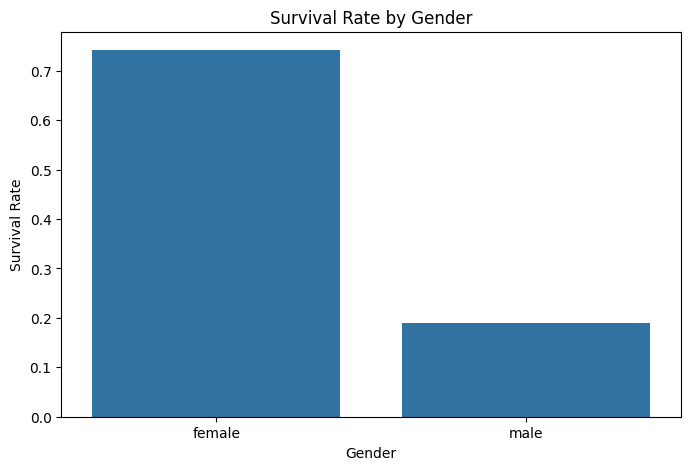

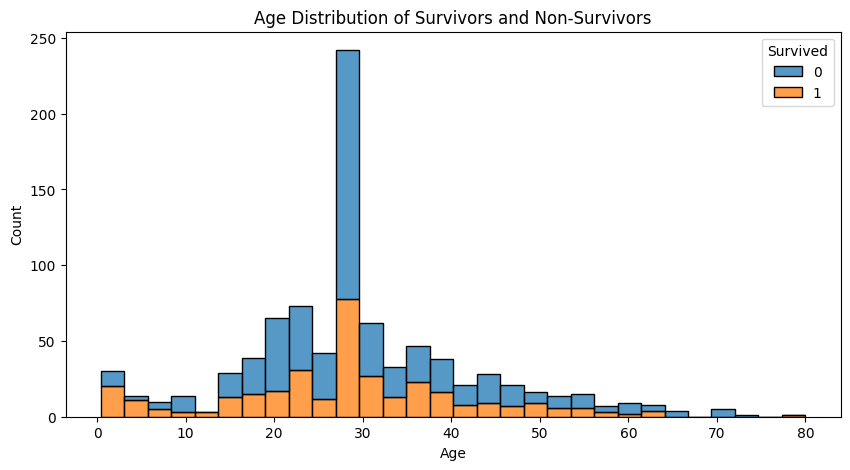

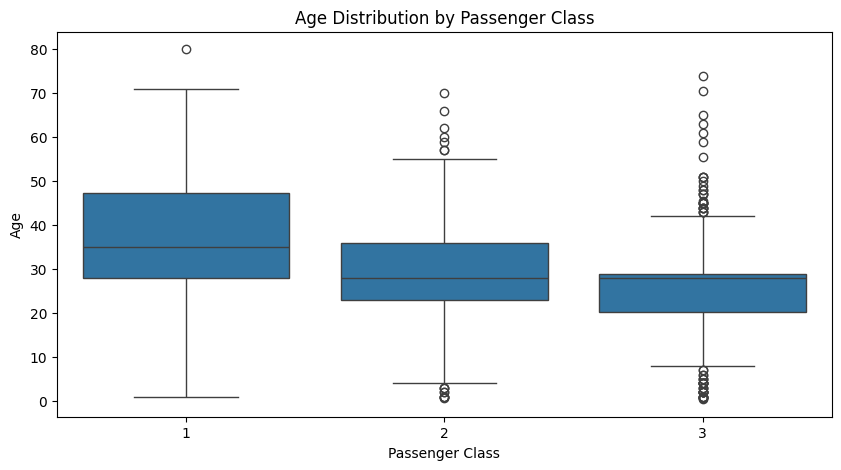

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

# Histogram for age distribution of survivors and non-survivors
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Box plot for age distribution by Pclass
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()